<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Day2.do.txt --no_mako -->
<!-- dom:TITLE: Lasso and Ridge Regression -->

# Lasso and Ridge Regression
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and Facility for Rare Isotope Beams, Michigan State University, USA

Date: **October 9, 2023**

## Ridge and LASSO Regression

Let us remind ourselves about the expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, that is 
our optimization problem is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

or we can state it as

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2,
$$

where we have used the definition of  a norm-2 vector, that is

$$
\vert\vert \boldsymbol{x}\vert\vert_2 = \sqrt{\sum_i x_i^2}.
$$

## From OLS to Ridge and Lasso

By minimizing the above equation with respect to the parameters
$\boldsymbol{\beta}$ we could then obtain an analytical expression for the
parameters $\boldsymbol{\beta}$.  We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem where we
require that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is
a finite number larger than zero. We do not include such a constraints in the discussions here.

By defining

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1,
$$

we have a new optimization equation

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1
$$

which leads to Lasso regression. Lasso stands for least absolute shrinkage and selection operator. 

Here we have defined the norm-1 as

$$
\vert\vert \boldsymbol{x}\vert\vert_1 = \sum_i \vert x_i\vert.
$$

## Deriving the  Ridge Regression Equations

Using the matrix-vector expression for Ridge regression and dropping the parameter $1/n$ in front of the standard means squared error equation, we have

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\right\}+\lambda\boldsymbol{\beta}^T\boldsymbol{\beta},
$$

and 
taking the derivatives with respect to $\boldsymbol{\beta}$ we obtain then
a slightly modified matrix inversion problem which for finite values
of $\lambda$ does not suffer from singularity problems. We obtain
the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix with the constraint that

$$
\sum_{i=0}^{p-1} \beta_i^2 \leq t,
$$

with $t$ a finite positive number.

## Note on Scikit-Learn

Note well that a library like **Scikit-Learn** does not include the $1/n$ factor in the expression for the mean-squared error. If you include it, the optimal parameter $\beta$ becomes

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+n\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

In our codes where we compare our own codes with **Scikit-Learn**, we do thus not include the $1/n$ factor in the cost function.

## Comparison with OLS
When we compare this with the ordinary least squares result we have

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

which can lead to singular matrices. However, with the SVD, we can always compute the inverse of the matrix $\boldsymbol{X}^T\boldsymbol{X}$.

We see that Ridge regression is nothing but the standard OLS with a
modified diagonal term added to $\boldsymbol{X}^T\boldsymbol{X}$. The consequences, in
particular for our discussion of the bias-variance tradeoff are rather
interesting. We will see that for specific values of $\lambda$, we may
even reduce the variance of the optimal parameters $\boldsymbol{\beta}$. These topics and other related ones, will be discussed after the more linear algebra oriented analysis here.

## SVD analysis

Using our insights about the SVD of the design matrix $\boldsymbol{X}$ 
We have already analyzed the OLS solutions in terms of the eigenvectors (the columns) of the right singular value matrix $\boldsymbol{U}$ as

$$
\tilde{\boldsymbol{y}}_{\mathrm{OLS}}=\boldsymbol{X}\boldsymbol{\beta}  =\boldsymbol{U}\boldsymbol{U}^T\boldsymbol{y}.
$$

For Ridge regression this becomes

$$
\tilde{\boldsymbol{y}}_{\mathrm{Ridge}}=\boldsymbol{X}\boldsymbol{\beta}_{\mathrm{Ridge}} = \boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{\Sigma}^2\boldsymbol{V}^T+\lambda\boldsymbol{I} \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\frac{\sigma_j^2}{\sigma_j^2+\lambda}\boldsymbol{y},
$$

with the vectors $\boldsymbol{u}_j$ being the columns of $\boldsymbol{U}$ from the SVD of the matrix $\boldsymbol{X}$.

## Interpreting the Ridge results

Since $\lambda \geq 0$, it means that compared to OLS, we have

$$
\frac{\sigma_j^2}{\sigma_j^2+\lambda} \leq 1.
$$

Ridge regression finds the coordinates of $\boldsymbol{y}$ with respect to the
orthonormal basis $\boldsymbol{U}$, it then shrinks the coordinates by
$\frac{\sigma_j^2}{\sigma_j^2+\lambda}$. Recall that the SVD has
eigenvalues ordered in a descending way, that is $\sigma_i \geq
\sigma_{i+1}$.

For small eigenvalues $\sigma_i$ it means that their contributions become less important, a fact which can be used to reduce the number of degrees of freedom. More about this when we have covered the material on a statistical interpretation of various linear regression methods.

## More interpretations

For the sake of simplicity, let us assume that the design matrix is orthonormal, that is

$$
\boldsymbol{X}^T\boldsymbol{X}=(\boldsymbol{X}^T\boldsymbol{X})^{-1} =\boldsymbol{I}.
$$

In this case the standard OLS results in

$$
\boldsymbol{\beta}^{\mathrm{OLS}} = \boldsymbol{X}^T\boldsymbol{y}=\sum_{i=0}^{n-1}\boldsymbol{u}_i\boldsymbol{u}_i^T\boldsymbol{y},
$$

and

$$
\boldsymbol{\beta}^{\mathrm{Ridge}} = \left(\boldsymbol{I}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}=\left(1+\lambda\right)^{-1}\boldsymbol{\beta}^{\mathrm{OLS}},
$$

that is the Ridge estimator scales the OLS estimator by the inverse of a factor $1+\lambda$, and
the Ridge estimator converges to zero when the hyperparameter goes to
infinity.

We will come back to more interpreations after we have gone through some of the statistical analysis part. 

For more discussions of Ridge and Lasso regression, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.
Similarly, [Mehta et al's article](https://arxiv.org/abs/1803.08823) is also recommended.

## Deriving the  Lasso Regression Equations

Using the matrix-vector expression for Lasso regression, we have the following **cost** function

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\right\}+\lambda\vert\vert\boldsymbol{\beta}\vert\vert_1,
$$

Taking the derivative with respect to $\boldsymbol{\beta}$ and recalling that the derivative of the absolute value is (we drop the boldfaced vector symbol for simplicity)

$$
\frac{d \vert \beta\vert}{d \beta}=\mathrm{sgn}(\beta)=\left\{\begin{array}{cc} 1 & \beta > 0 \\-1 & \beta < 0, \end{array}\right.
$$

we have that the derivative of the cost function is

$$
\frac{\partial C(\boldsymbol{X},\boldsymbol{\beta})}{\partial \boldsymbol{\beta}}=-\frac{2}{n}\boldsymbol{X}^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})+\lambda sgn(\boldsymbol{\beta})=0,
$$

and reordering we have

$$
\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta}+\lambda sgn(\boldsymbol{\beta})=\boldsymbol{X}^T\boldsymbol{y}.
$$

This equation does not lead to a nice analytical equation as in Ridge regression or ordinary least squares. We have absorbed the factor $2/n$ in a redefinition of the parameter $\lambda$. We will solve this type of problems using libraries like **scikit-learn**.

## Simple example to illustrate Ordinary Least Squares, Ridge and Lasso Regression

Let us assume that our design matrix is given by unit (identity) matrix, that is a square diagonal matrix with ones only along the
diagonal. In this case we have an equal number of rows and columns $n=p$.

Our model approximation is just $\tilde{\boldsymbol{y}}=\boldsymbol{\beta}$ and the mean squared error and thereby the cost function for ordinary least sqquares (OLS) is then (we drop the term $1/n$)

$$
C(\boldsymbol{\beta})=\sum_{i=0}^{p-1}(y_i-\beta_i)^2,
$$

and minimizing we have that

$$
\hat{\beta}_i^{\mathrm{OLS}} = y_i.
$$

## Ridge Regression

For Ridge regression our cost function is

$$
C(\boldsymbol{\beta})=\sum_{i=0}^{p-1}(y_i-\beta_i)^2+\lambda\sum_{i=0}^{p-1}\beta_i^2,
$$

and minimizing we have that

$$
\hat{\beta}_i^{\mathrm{Ridge}} = \frac{y_i}{1+\lambda}.
$$

## Lasso Regression

For Lasso regression our cost function is

$$
C(\boldsymbol{\beta})=\sum_{i=0}^{p-1}(y_i-\beta_i)^2+\lambda\sum_{i=0}^{p-1}\vert\beta_i\vert=\sum_{i=0}^{p-1}(y_i-\beta_i)^2+\lambda\sum_{i=0}^{p-1}\sqrt{\beta_i^2},
$$

and minimizing we have that

$$
-2\sum_{i=0}^{p-1}(y_i-\beta_i)+\lambda \sum_{i=0}^{p-1}\frac{(\beta_i)}{\vert\beta_i\vert}=0,
$$

which leads to

$$
\hat{\boldsymbol{\beta}}_i^{\mathrm{Lasso}} = \left\{\begin{array}{ccc}y_i-\frac{\lambda}{2} &\mathrm{if} & y_i> \frac{\lambda}{2}\\
                                                          y_i+\frac{\lambda}{2} &\mathrm{if} & y_i< -\frac{\lambda}{2}\\
							  0 &\mathrm{if} & \vert y_i\vert\le  \frac{\lambda}{2}\end{array}\right.\\.
$$

Plotting these results shows clearly that Lasso regression suppresses (sets to zero) values of $\beta_i$ for specific values of $\lambda$. Ridge regression reduces on the other hand the values of $\beta_i$ as function of $\lambda$.

## Yet another Example

Let us assume we have a data set with outputs/targets given by the vector

$$
\boldsymbol{y}=\begin{bmatrix}4 \\ 2 \\3\end{bmatrix},
$$

and our inputs as a $3\times 2$ design matrix

$$
\boldsymbol{X}=\begin{bmatrix}2 & 0\\ 0 & 1 \\ 0 & 0\end{bmatrix},
$$

meaning that we have two features and two unknown parameters $\beta_0$ and $\beta_1$ to be determined either by ordinary least squares, Ridge or Lasso regression.

## The OLS case

For ordinary least squares (OLS) we know that the optimal solution is

$$
\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}=\left( \boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

Inserting the above values we obtain that

$$
\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}=\begin{bmatrix}2 \\ 2\end{bmatrix},
$$

The code which implements this simpler case is presented after the discussion of Ridge and Lasso.

## The Ridge case

For Ridge regression we have

$$
\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}=\left( \boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

Inserting the above values we obtain that

$$
\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}=\begin{bmatrix}\frac{8}{4+\lambda} \\ \frac{2}{1+\lambda}\end{bmatrix},
$$

There is normally a constraint on the value of $\vert\vert \boldsymbol{\beta}\vert\vert_2$ via the parameter $\lambda$.
Let us for simplicity assume that $\beta_0^2+\beta_1^2=1$ as constraint. This will allow us to find an expression for the optimal values of $\beta$ and $\lambda$.

To see this, let us write the cost function for Ridge regression.

## Writing the Cost Function

We define the MSE without the $1/n$ factor and have then, using that

$$
\boldsymbol{X}\boldsymbol{\beta}=\begin{bmatrix} 2\beta_0 \\ \beta_1 \\0 \end{bmatrix},
$$

$$
C(\boldsymbol{\beta})=(4-2\beta_0)^2+(2-\beta_1)^2+\lambda(\beta_0^2+\beta_1^2),
$$

and taking the derivative with respect to $\beta_0$ we get

$$
\beta_0=\frac{8}{4+\lambda},
$$

and for $\beta_1$ we obtain

$$
\beta_1=\frac{2}{1+\lambda},
$$

Using the constraint for $\beta_0^2+\beta_1^2=1$ we can constrain $\lambda$ by solving

$$
\left(\frac{8}{4+\lambda}\right)^2+\left(\frac{2}{1+\lambda}\right)^2=1,
$$

which gives $\lambda=4.571$ and $\beta_0=0.933$ and $\beta_1=0.359$.

## Lasso case

For Lasso we need now, keeping a  constraint on $\vert\beta_0\vert+\vert\beta_1\vert=1$,  to take the derivative of the absolute values of $\beta_0$
and $\beta_1$. This gives us the following derivatives of the cost function

$$
C(\boldsymbol{\beta})=(4-2\beta_0)^2+(2-\beta_1)^2+\lambda(\vert\beta_0\vert+\vert\beta_1\vert),
$$

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \beta_0}=-4(4-2\beta_0)+\lambda\mathrm{sgn}(\beta_0)=0,
$$

and

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \beta_1}=-2(2-\beta_1)+\lambda\mathrm{sgn}(\beta_1)=0.
$$

We have now four cases to solve besides the trivial cases $\beta_0$ and/or $\beta_1$ are zero, namely
1. $\beta_0 > 0$ and $\beta_1 > 0$,

2. $\beta_0 > 0$ and $\beta_1 < 0$,

3. $\beta_0 < 0$ and $\beta_1 > 0$,

4. $\beta_0 < 0$ and $\beta_1 < 0$.

## The first Case

If we consider the first case, we have then

$$
-4(4-2\beta_0)+\lambda=0,
$$

and

$$
-2(2-\beta_1)+\lambda=0.
$$

which yields

$$
\beta_0=\frac{16+\lambda}{8},
$$

and

$$
\beta_1=\frac{4+\lambda}{2}.
$$

Using the constraint on $\beta_0$ and $\beta_1$ we can then find the optimal value of $\lambda$ for the different cases. We leave this as an exercise to you.

## Simple code for solving the above problem

Here we set up the OLS, Ridge and Lasso functionality in order to study the above example. Note that here we have opted for a set of values of $\lambda$, meaning that we need to perform a search in order to find the optimal values.

First we study and compare the OLS and Ridge results.  The next code compares all three methods.

[2. 2.]
Training MSE for OLS
3.0


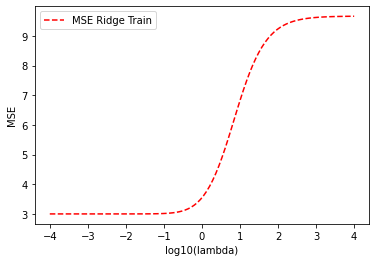

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.

X = np.array( [ [ 2, 0], [0, 1], [0,0]])
y = np.array( [4, 2, 3])


# matrix inversion to find beta
OLSbeta = np.linalg.inv(X.T @ X) @ X.T @ y
print(OLSbeta)
# and then make the prediction
ytildeOLS = X @ OLSbeta
print("Training MSE for OLS")
print(MSE(y,ytildeOLS))
ypredictOLS = X @ OLSbeta

# Repeat now for Ridge regression and various values of the regularization parameter
I = np.eye(2,2)
# Decide which values of lambda to use
nlambdas = 100
MSEPredict = np.zeros(nlambdas)
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X.T @ X+lmb*I) @ X.T @ y
#    print(Ridgebeta)
    # and then make the prediction
    ypredictRidge = X @ Ridgebeta
    MSEPredict[i] = MSE(y,ypredictRidge)
#    print(MSEPredict[i])
    # Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSEPredict, 'r--', label = 'MSE Ridge Train')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

We see here that we reach a plateau. What is actually happening?

## With Lasso Regression

[2. 2.]
Training MSE for OLS
3.0
[1.99995    1.99980002]
[1.999925 1.9997  ]
[1.99993978 1.99975913]
[1.99990966 1.99963865]
[1.99992746 1.99970988]
[1.99989119 1.99956475]
[1.99991263 1.99965056]
[1.99986894 1.99947574]
[1.99989476 1.99957911]
[1.99984213 1.99936853]
[1.99987324 1.99949306]
[1.99980985 1.99923939]
[1.99984732 1.99938942]
[1.99977096 1.99908384]
[1.9998161  1.99926459]
[1.99972412 1.99889649]
[1.99977849 1.99911427]
[1.9996677  1.99867081]
[1.9997332  1.99893323]
[1.99959975 1.99839899]
[1.99967865 1.99871521]
[1.99951789 1.99807158]
[1.99961294 1.99845267]
[1.9994193  1.99767721]
[1.99953381 1.99813653]
[1.99930055 1.99720219]
[1.9994385  1.99775587]
[1.99915751 1.99663003]
[1.9993237  1.99729756]
[1.99898521 1.99594086]
[1.99918546 1.9967458 ]
[1.99877769 1.99511075]
[1.99901896 1.99608161]
[1.99852772 1.99411088]
[1.99881845 1.99528218]
[1.99822663 1.99290653]
[1.998577  1.9943201]
[1.99786397 1.99145589]
[1.99828624 1.99316252]
[1.99742715 1.98970859]
[1.99793613 1

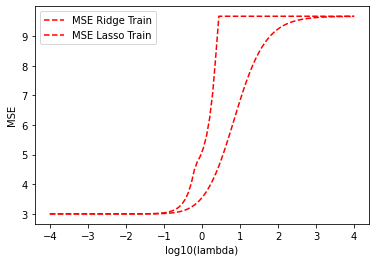

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.

X = np.array( [ [ 2, 0], [0, 1], [0,0]])
y = np.array( [4, 2, 3])


# matrix inversion to find beta
OLSbeta = np.linalg.inv(X.T @ X) @ X.T @ y
print(OLSbeta)
# and then make the prediction
ytildeOLS = X @ OLSbeta
print("Training MSE for OLS")
print(MSE(y,ytildeOLS))
ypredictOLS = X @ OLSbeta

# Repeat now for Ridge regression and various values of the regularization parameter
I = np.eye(2,2)
# Decide which values of lambda to use
nlambdas = 100
MSERidgePredict = np.zeros(nlambdas)
MSELassoPredict = np.zeros(nlambdas)
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X.T @ X+lmb*I) @ X.T @ y
    print(Ridgebeta)
    # and then make the prediction
    ypredictRidge = X @ Ridgebeta
    MSERidgePredict[i] = MSE(y,ypredictRidge)
    RegLasso = linear_model.Lasso(lmb,fit_intercept=False)
    RegLasso.fit(X,y)
    ypredictLasso = RegLasso.predict(X)
    print(RegLasso.coef_)
    MSELassoPredict[i] = MSE(y,ypredictLasso)
# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSERidgePredict, 'r--', label = 'MSE Ridge Train')
plt.plot(np.log10(lambdas), MSELassoPredict, 'r--', label = 'MSE Lasso Train')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Another Example, now with a polynomial fit

[ 2.03099776 -0.17917768  5.18029127]
Training MSE for OLS
0.009163470508352216
Test MSE OLS
0.008675369724975868


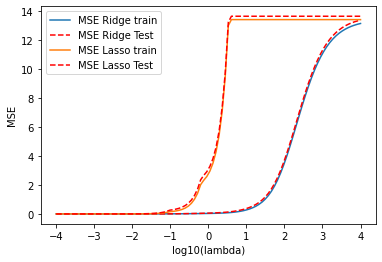

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

x = np.random.rand(100)
y = 2.0+5*x*x+0.1*np.random.randn(100)

# number of features p (here degree of polynomial
p = 3
#  The design matrix now as function of a given polynomial
X = np.zeros((len(x),p))
X[:,0] = 1.0
X[:,1] = x
X[:,2] = x*x
# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# matrix inversion to find beta
OLSbeta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(OLSbeta)
# and then make the prediction
ytildeOLS = X_train @ OLSbeta
print("Training MSE for OLS")
print(MSE(y_train,ytildeOLS))
ypredictOLS = X_test @ OLSbeta
print("Test MSE OLS")
print(MSE(y_test,ypredictOLS))

# Repeat now for Lasso and Ridge regression and various values of the regularization parameter
I = np.eye(p,p)
# Decide which values of lambda to use
nlambdas = 100
MSEPredict = np.zeros(nlambdas)
MSETrain = np.zeros(nlambdas)
MSELassoPredict = np.zeros(nlambdas)
MSELassoTrain = np.zeros(nlambdas)
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X_train.T @ X_train+lmb*I) @ X_train.T @ y_train
    # include lasso using Scikit-Learn
    RegLasso = linear_model.Lasso(lmb,fit_intercept=False)
    RegLasso.fit(X_train,y_train)
    # and then make the prediction
    ytildeRidge = X_train @ Ridgebeta
    ypredictRidge = X_test @ Ridgebeta
    ytildeLasso = RegLasso.predict(X_train)
    ypredictLasso = RegLasso.predict(X_test)
    MSEPredict[i] = MSE(y_test,ypredictRidge)
    MSETrain[i] = MSE(y_train,ytildeRidge)
    MSELassoPredict[i] = MSE(y_test,ypredictLasso)
    MSELassoTrain[i] = MSE(y_train,ytildeLasso)

# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSETrain, label = 'MSE Ridge train')
plt.plot(np.log10(lambdas), MSEPredict, 'r--', label = 'MSE Ridge Test')
plt.plot(np.log10(lambdas), MSELassoTrain, label = 'MSE Lasso train')
plt.plot(np.log10(lambdas), MSELassoPredict, 'r--', label = 'MSE Lasso Test')

plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Important technicalities: More on Rescaling data

When you are comparing your own code with for example **Scikit-Learn**'s
library, there are some technicalities to keep in mind.  The examples
here demonstrate some of these aspects with potential pitfalls.

The discussion here focuses on the role of the intercept, how we can
set up the design matrix, what scaling we should use and other topics
which tend  confuse us.

The intercept can be interpreted as the expected value of our
target/output variables when all other predictors are set to zero.
Thus, if we cannot assume that the expected outputs/targets are zero
when all predictors are zero (the columns in the design matrix), it
may be a bad idea to implement a model which penalizes the intercept.
Furthermore, in for example Ridge and Lasso regression, the default solutions
from the library **Scikit-Learn** (when not shrinking $\beta_0$) for the unknown parameters
$\boldsymbol{\beta}$, are derived under the assumption that both $\boldsymbol{y}$ and
$\boldsymbol{X}$ are zero centered, that is we subtract the mean values.

If our predictors represent different scales, then it is important to
standardize the design matrix $\boldsymbol{X}$ by subtracting the mean of each
column from the corresponding column and dividing the column with its
standard deviation. Most machine learning libraries do this as a default. This means that if you compare your code with the results from a given library,
the results may differ. 

The
[Standardscaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
function in **Scikit-Learn** does this for us.  For the data sets we
have been studying in our various examples, the data are in many cases
already scaled and there is no need to scale them. You as a user of different machine learning algorithms, should always perform  a
survey of your data, with a critical assessment of them in case you need to scale the data.

If you need to scale the data, not doing so will give an *unfair*
penalization of the parameters since their magnitude depends on the
scale of their corresponding predictor.

Suppose as an example that you 
you have an input variable given by the heights of different persons.
Human height might be measured in inches or meters or
kilometers. If measured in kilometers, a standard linear regression
model with this predictor would probably give a much bigger
coefficient term, than if measured in millimeters.
This can clearly lead to problems in evaluating the cost/loss functions.

Keep in mind that when you transform your data set before training a model, the same transformation needs to be done
on your eventual new data set  before making a prediction. If we translate this into a Python code, it would could be implemented as

In [4]:
"""
#Model training, we compute the mean value of y and X
y_train_mean = np.mean(y_train)
X_train_mean = np.mean(X_train,axis=0)
X_train = X_train - X_train_mean
y_train = y_train - y_train_mean

# The we fit our model with the training data
trained_model = some_model.fit(X_train,y_train)


#Model prediction, we need also to transform our data set used for the prediction.
X_test = X_test - X_train_mean #Use mean from training data
y_pred = trained_model(X_test)
y_pred = y_pred + y_train_mean
"""

Let us try to understand what this may imply mathematically when we
subtract the mean values, also known as *zero centering*. For
simplicity, we will focus on  ordinary regression, as done in the above example.

The cost/loss function  for regression is

$$
C(\beta_0, \beta_1, ... , \beta_{p-1}) = \frac{1}{n}\sum_{i=0}^{n} \left(y_i - \beta_0 - \sum_{j=1}^{p-1} X_{ij}\beta_j\right)^2,.
$$

Recall also that we use the squared value. This expression can lead to an
increased penalty for higher differences between predicted and
output/target values.

What we have done is to single out the $\beta_0$ term in the
definition of the mean squared error (MSE).  The design matrix $X$
does in this case not contain any intercept column.  When we take the
derivative with respect to $\beta_0$, we want the derivative to obey

$$
\frac{\partial C}{\partial \beta_j} = 0,
$$

for all $j$. For $\beta_0$ we have

$$
\frac{\partial C}{\partial \beta_0} = -\frac{2}{n}\sum_{i=0}^{n-1} \left(y_i - \beta_0 - \sum_{j=1}^{p-1} X_{ij} \beta_j\right).
$$

Multiplying away the constant $2/n$, we obtain

$$
\sum_{i=0}^{n-1} \beta_0 = \sum_{i=0}^{n-1}y_i - \sum_{i=0}^{n-1} \sum_{j=1}^{p-1} X_{ij} \beta_j.
$$

Let us specialize first to the case where we have only two parameters $\beta_0$ and $\beta_1$.
Our result for $\beta_0$ simplifies then to

$$
n\beta_0 = \sum_{i=0}^{n-1}y_i - \sum_{i=0}^{n-1} X_{i1} \beta_1.
$$

We obtain then

$$
\beta_0 = \frac{1}{n}\sum_{i=0}^{n-1}y_i - \beta_1\frac{1}{n}\sum_{i=0}^{n-1} X_{i1}.
$$

If we define

$$
\mu_{\boldsymbol{x}_1}=\frac{1}{n}\sum_{i=0}^{n-1} X_{i1},
$$

and the mean value of the outputs as

$$
\mu_y=\frac{1}{n}\sum_{i=0}^{n-1}y_i,
$$

we have

$$
\beta_0 = \mu_y - \beta_1\mu_{\boldsymbol{x}_1}.
$$

In the general case with more parameters than $\beta_0$ and $\beta_1$, we have

$$
\beta_0 = \frac{1}{n}\sum_{i=0}^{n-1}y_i - \frac{1}{n}\sum_{i=0}^{n-1}\sum_{j=1}^{p-1} X_{ij}\beta_j.
$$

We can rewrite the latter equation as

$$
\beta_0 = \frac{1}{n}\sum_{i=0}^{n-1}y_i - \sum_{j=1}^{p-1} \mu_{\boldsymbol{x}_j}\beta_j,
$$

where we have defined

$$
\mu_{\boldsymbol{x}_j}=\frac{1}{n}\sum_{i=0}^{n-1} X_{ij},
$$

the mean value for all elements of the column vector $\boldsymbol{x}_j$.

Replacing $y_i$ with $y_i - y_i - \overline{\boldsymbol{y}}$ and centering also our design matrix results in a cost function (in vector-matrix disguise)

$$
C(\boldsymbol{\beta}) = (\boldsymbol{\tilde{y}} - \tilde{X}\boldsymbol{\beta})^T(\boldsymbol{\tilde{y}} - \tilde{X}\boldsymbol{\beta}).
$$

If we minimize with respect to $\boldsymbol{\beta}$ we have then

$$
\hat{\boldsymbol{\beta}} = (\tilde{X}^T\tilde{X})^{-1}\tilde{X}^T\boldsymbol{\tilde{y}},
$$

where $\boldsymbol{\tilde{y}} = \boldsymbol{y} - \overline{\boldsymbol{y}}$
and $\tilde{X}_{ij} = X_{ij} - \frac{1}{n}\sum_{k=0}^{n-1}X_{kj}$.

For Ridge regression we need to add $\lambda \boldsymbol{\beta}^T\boldsymbol{\beta}$ to the cost function and get then

$$
\hat{\boldsymbol{\beta}} = (\tilde{X}^T\tilde{X} + \lambda I)^{-1}\tilde{X}^T\boldsymbol{\tilde{y}}.
$$

What does this mean? And why do we insist on all this? Let us look at some examples.

This code shows a simple first-order fit to a data set using the above transformed data, where we consider the role of the intercept first, by either excluding it or including it (*code example thanks to  Øyvind Sigmundson Schøyen*). Here our scaling of the data is done by subtracting the mean values only.
Note also that we do not split the data into training and test.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


np.random.seed(2021)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


def fit_beta(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y


true_beta = [2, 0.5, 3.7]

x = np.linspace(0, 1, 11)
y = np.sum(
    np.asarray([x ** p * b for p, b in enumerate(true_beta)]), axis=0
) + 0.1 * np.random.normal(size=len(x))

degree = 3
X = np.zeros((len(x), degree))

# Include the intercept in the design matrix
for p in range(degree):
    X[:, p] = x ** p

beta = fit_beta(X, y)

# Intercept is included in the design matrix
skl = LinearRegression(fit_intercept=False).fit(X, y)

print(f"True beta: {true_beta}")
print(f"Fitted beta: {beta}")
print(f"Sklearn fitted beta: {skl.coef_}")
ypredictOwn = X @ beta
ypredictSKL = skl.predict(X)
print(f"MSE with intercept column")
print(MSE(y,ypredictOwn))
print(f"MSE with intercept column from SKL")
print(MSE(y,ypredictSKL))


plt.figure()
plt.scatter(x, y, label="Data")
plt.plot(x, X @ beta, label="Fit")
plt.plot(x, skl.predict(X), label="Sklearn (fit_intercept=False)")


# Do not include the intercept in the design matrix
X = np.zeros((len(x), degree - 1))

for p in range(degree - 1):
    X[:, p] = x ** (p + 1)

# Intercept is not included in the design matrix
skl = LinearRegression(fit_intercept=True).fit(X, y)

# Use centered values for X and y when computing coefficients
y_offset = np.average(y, axis=0)
X_offset = np.average(X, axis=0)

beta = fit_beta(X - X_offset, y - y_offset)
intercept = np.mean(y_offset - X_offset @ beta)

print(f"Manual intercept: {intercept}")
print(f"Fitted beta (wiothout intercept): {beta}")
print(f"Sklearn intercept: {skl.intercept_}")
print(f"Sklearn fitted beta (without intercept): {skl.coef_}")
ypredictOwn = X @ beta
ypredictSKL = skl.predict(X)
print(f"MSE with Manual intercept")
print(MSE(y,ypredictOwn+intercept))
print(f"MSE with Sklearn intercept")
print(MSE(y,ypredictSKL))

plt.plot(x, X @ beta + intercept, "--", label="Fit (manual intercept)")
plt.plot(x, skl.predict(X), "--", label="Sklearn (fit_intercept=True)")
plt.grid()
plt.legend()

plt.show()

The intercept is the value of our output/target variable
when all our features are zero and our function crosses the $y$-axis (for a one-dimensional case). 

Printing the MSE, we see first that both methods give the same MSE, as
they should.  However, when we move to for example Ridge regression,
the way we treat the intercept may give a larger or smaller MSE,
meaning that the MSE can be penalized by the value of the
intercept. Not including the intercept in the fit, means that the
regularization term does not include $\beta_0$. For different values
of $\lambda$, this may lead to different MSE values. 

To remind the reader, the regularization term, with the intercept in Ridge regression, is given by

$$
\lambda \vert\vert \boldsymbol{\beta} \vert\vert_2^2 = \lambda \sum_{j=0}^{p-1}\beta_j^2,
$$

but when we take out the intercept, this equation becomes

$$
\lambda \vert\vert \boldsymbol{\beta} \vert\vert_2^2 = \lambda \sum_{j=1}^{p-1}\beta_j^2.
$$

For Lasso regression we have

$$
\lambda \vert\vert \boldsymbol{\beta} \vert\vert_1 = \lambda \sum_{j=1}^{p-1}\vert\beta_j\vert.
$$

It means that, when scaling the design matrix and the outputs/targets,
by subtracting the mean values, we have an optimization problem which
is not penalized by the intercept. The MSE value can then be smaller
since it focuses only on the remaining quantities. If we however bring
back the intercept, we will get a MSE which then contains the
intercept.

Armed with this wisdom, we attempt first to simply set the intercept equal to **False** in our implementation of Ridge regression for our well-known  vanilla data set.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

n = 100
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)

Maxpolydegree = 20
X = np.zeros((n,Maxpolydegree))
#We include explicitely the intercept column
for degree in range(Maxpolydegree):
    X[:,degree] = x**degree
# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

p = Maxpolydegree
I = np.eye(p,p)
# Decide which values of lambda to use
nlambdas = 6
MSEOwnRidgePredict = np.zeros(nlambdas)
MSERidgePredict = np.zeros(nlambdas)
lambdas = np.logspace(-4, 2, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    OwnRidgeBeta = np.linalg.pinv(X_train.T @ X_train+lmb*I) @ X_train.T @ y_train
    # Note: we include the intercept column and no scaling
    RegRidge = linear_model.Ridge(lmb,fit_intercept=False)
    RegRidge.fit(X_train,y_train)
    # and then make the prediction
    ytildeOwnRidge = X_train @ OwnRidgeBeta
    ypredictOwnRidge = X_test @ OwnRidgeBeta
    ytildeRidge = RegRidge.predict(X_train)
    ypredictRidge = RegRidge.predict(X_test)
    MSEOwnRidgePredict[i] = MSE(y_test,ypredictOwnRidge)
    MSERidgePredict[i] = MSE(y_test,ypredictRidge)
    print("Beta values for own Ridge implementation")
    print(OwnRidgeBeta)
    print("Beta values for Scikit-Learn Ridge implementation")
    print(RegRidge.coef_)
    print("MSE values for own Ridge implementation")
    print(MSEOwnRidgePredict[i])
    print("MSE values for Scikit-Learn Ridge implementation")
    print(MSERidgePredict[i])

# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSEOwnRidgePredict, 'r', label = 'MSE own Ridge Test')
plt.plot(np.log10(lambdas), MSERidgePredict, 'g', label = 'MSE Ridge Test')

plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

The results here agree when we force **Scikit-Learn**'s Ridge function to include the first column in our design matrix.
We see that the results agree very well. Here we have thus explicitely included the intercept column in the design matrix.
What happens if we do not include the intercept in our fit?
Let us see how we can change this code by zero centering.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n
# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(315)

n = 100
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)

Maxpolydegree = 20
X = np.zeros((n,Maxpolydegree-1))

for degree in range(1,Maxpolydegree): #No intercept column
    X[:,degree-1] = x**(degree)

# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#For our own implementation, we will need to deal with the intercept by centering the design matrix and the target variable
X_train_mean = np.mean(X_train,axis=0)
#Center by removing mean from each feature
X_train_scaled = X_train - X_train_mean 
X_test_scaled = X_test - X_train_mean
#The model intercept (called y_scaler) is given by the mean of the target variable (IF X is centered)
#Remove the intercept from the training data.
y_scaler = np.mean(y_train)           
y_train_scaled = y_train - y_scaler   

p = Maxpolydegree-1
I = np.eye(p,p)
# Decide which values of lambda to use
nlambdas = 6
MSEOwnRidgePredict = np.zeros(nlambdas)
MSERidgePredict = np.zeros(nlambdas)

lambdas = np.logspace(-4, 2, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    OwnRidgeBeta = np.linalg.pinv(X_train_scaled.T @ X_train_scaled+lmb*I) @ X_train_scaled.T @ (y_train_scaled)
    intercept_ = y_scaler - X_train_mean@OwnRidgeBeta #The intercept can be shifted so the model can predict on uncentered data
    #Add intercept to prediction
    ypredictOwnRidge = X_test_scaled @ OwnRidgeBeta + y_scaler 
    RegRidge = linear_model.Ridge(lmb)
    RegRidge.fit(X_train,y_train)
    ypredictRidge = RegRidge.predict(X_test)
    MSEOwnRidgePredict[i] = MSE(y_test,ypredictOwnRidge)
    MSERidgePredict[i] = MSE(y_test,ypredictRidge)
    print("Beta values for own Ridge implementation")
    print(OwnRidgeBeta) #Intercept is given by mean of target variable
    print("Beta values for Scikit-Learn Ridge implementation")
    print(RegRidge.coef_)
    print('Intercept from own implementation:')
    print(intercept_)
    print('Intercept from Scikit-Learn Ridge implementation')
    print(RegRidge.intercept_)
    print("MSE values for own Ridge implementation")
    print(MSEOwnRidgePredict[i])
    print("MSE values for Scikit-Learn Ridge implementation")
    print(MSERidgePredict[i])


# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSEOwnRidgePredict, 'b--', label = 'MSE own Ridge Test')
plt.plot(np.log10(lambdas), MSERidgePredict, 'g--', label = 'MSE SL Ridge Test')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

We see here, when compared to the code which includes explicitely the
intercept column, that our MSE value is actually smaller. This is
because the regularization term does not include the intercept value
$\beta_0$ in the fitting.  This applies to Lasso regularization as
well.  It means that our optimization is now done only with the
centered matrix and/or vector that enter the fitting procedure.

## Test Function for what happens with OLS, Ridge and Lasso

Hitherto we have discussed Ridge and Lasso regression in terms of a
linear analysis. This may to many of you feel rather technical and
perhaps not that intuitive. The question is whether we can develop a
more intuitive way of understanding what Ridge and Lasso express.

Before we proceed let us perform a Ridge, Lasso  and OLS analysis of a polynomial fit. 

We will play around with a study of the values for the optimal
parameters $\boldsymbol{\beta}$ using OLS, Ridge and Lasso regression.  For
OLS, you will notice as function of the noise and polynomial degree,
that the parameters $\beta$ will fluctuate from order to order in the
polynomial fit and that for larger and larger polynomial degrees of freedom, the parameters will tend to increase in value for OLS.

For Ridge and Lasso regression, the higher order parameters will typically be reduced, providing thereby less fluctuations from one order to another one.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# Make data set.
n = 10000
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.randn(n)

Maxpolydegree = 5
X = np.zeros((len(x),Maxpolydegree))
X[:,0] = 1.0


for polydegree in range(1,Maxpolydegree):
    X[:,polydegree] = x**(polydegree)

# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# matrix inversion to find beta
OLSbeta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
print(OLSbeta)
ypredictOLS = X_test @ OLSbeta
print("Test MSE OLS")
print(MSE(y_test,ypredictOLS))
# Repeat now for Lasso and Ridge regression and various values of the regularization parameter using Scikit-Learn
# Decide which values of lambda to use
nlambdas = 4
MSERidgePredict = np.zeros(nlambdas)
MSELassoPredict = np.zeros(nlambdas)
lambdas = np.logspace(-3, 1, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    # Make the fit using Ridge and Lasso
    RegRidge = linear_model.Ridge(lmb,fit_intercept=False)
    RegRidge.fit(X_train,y_train)
    RegLasso = linear_model.Lasso(lmb,fit_intercept=False)
    RegLasso.fit(X_train,y_train)
    # and then make the prediction
    ypredictRidge = RegRidge.predict(X_test)
    ypredictLasso = RegLasso.predict(X_test)
    # Compute the MSE and print it
    MSERidgePredict[i] = MSE(y_test,ypredictRidge)
    MSELassoPredict[i] = MSE(y_test,ypredictLasso)
    print(lmb,RegRidge.coef_)
    print(lmb,RegLasso.coef_)
# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSERidgePredict, 'b', label = 'MSE Ridge Test')
plt.plot(np.log10(lambdas), MSELassoPredict, 'r', label = 'MSE Lasso Test')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Overarching aims of the exercises this week

This set of exercises form an important part of the first project to be presented later. The
analytical exercises deal with the material on the
mathematical interpretations of ordinary least squares and of Ridge
regression. The numerical exercises can be seen as a continuation of
exercise 3 from last week, with the inclusion of Ridge regression. This
material enters also the discussions of the first project.

## Exercise 1: Analytical exercises

The aim here is to derive the expression for the optimal parameters
using Ridge regression. Furthermore, using the singular value
decomposition, we will analyze the difference between the ordinary
least squares approach and Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the
optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

which we can also write as

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2,
$$

where we have used the definition of  a norm-2 vector, that is

$$
\vert\vert \boldsymbol{x}\vert\vert_2 = \sqrt{\sum_i x_i^2}.
$$

By minimizing the above equation with respect to the parameters
$\boldsymbol{\beta}$ we could then obtain an analytical expression for the
parameters $\boldsymbol{\beta}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. One can require as part of the optimization problem 
that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is
a finite number larger than zero. We will not implement that here.

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix with the constraint that

$$
\sum_{i=0}^{p-1} \beta_i^2 \leq t,
$$

with $t$ a finite positive number. In the optimization, we will not require that the latter is satisfied.

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

### b) The singular value decomposition

Here we will use the singular value decomposition of an $n\times p$ matrix $\boldsymbol{X}$ (our design matrix)

$$
\boldsymbol{X}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

to study properties of Ridge regression and ordinary least squares regression.
Here $\boldsymbol{U}$ and $\boldsymbol{V}$ are orthogonal matrices of dimensions
$n\times n$ and $p\times p$, respectively, and $\boldsymbol{\Sigma}$ is an
$n\times p$ matrix which contains the singular values only. This material was discussed during the lectures of week 35.

Show that you can write the 
OLS solutions in terms of the eigenvectors (the columns) of the orthogonal matrix  $\boldsymbol{U}$ as

$$
\tilde{\boldsymbol{y}}_{\mathrm{OLS}}=\boldsymbol{X}\boldsymbol{\beta}  = \sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\boldsymbol{y}.
$$

For Ridge regression, show that the corresponding equation is

$$
\tilde{\boldsymbol{y}}_{\mathrm{Ridge}}=\boldsymbol{X}\boldsymbol{\beta}_{\mathrm{Ridge}} = \boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{\Sigma}^2\boldsymbol{V}^T+\lambda\boldsymbol{I} \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\frac{\sigma_j^2}{\sigma_j^2+\lambda}\boldsymbol{y},
$$

with the vectors $\boldsymbol{u}_j$ being the columns of $\boldsymbol{U}$ from the SVD of the matrix $\boldsymbol{X}$. 

Give an interpretation of the results.  [Section 3.4 of Hastie et al's textbook gives a good discussion of the above results](https://link.springer.com/book/10.1007/978-0-387-84858-7).

## Exercise 2: Adding Ridge Regression

This exercise is a continuation of exercise 3 from last week.

We will use the same function to
generate our data set, still staying with a simple function $y(x)$
which we want to fit using linear regression, but now extending the
analysis to include the Ridge regression method.

In this exercise you need to include the same elements from last week, that is
1. scale your data by subtracting the mean value from each column in the design matrix.

2. perform a split of the data in a training set and a test set.

The addition to the analysis this time is the introduction of the hyperparameter $\lambda$ when introducing Ridge regression.

Extend the code from exercise 3 from last week to include Ridge regression with the hyperparameter $\lambda$. The optimal parameters $\hat{\beta}$ for Ridge regression can be obtained by matrix inversion in a similar way as done for ordinary least squares. You need to add to your code the following equations

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

The ordinary least squares result you encoded last week is given by

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

Use these results to compute the mean squared error for ordinary least
squares and Ridge regression first for a polynomial of degree five
with $n=100$ data points and five selected values of
$\lambda=[0.0001,0.001, 0.01,0.1,1.0]$. Compute thereafter the mean
squared error for the same values of $\lambda$ for polynomials of degree ten
and $15$. Discuss your results for the training MSE and test MSE with
Ridge regression and ordinary least squares.